# AIM
In this notebook we download and extract the data set of Melanoma. 

## DATA

In this notebook we download and extract the image data. 

The Melanome image data is taken from kaggle (https://www.kaggle.com/drscarlat/melanoma).

One may want to use kaggle-api https://github.com/Kaggle/kaggle-api to download the data

In [21]:
# Please uncomment and install if some packages are required
# !pip install -r requirements.txt
# It is recommended to run it from the terminal rather than notebook cell

## LIBRARIES / PACKAGES

In [1]:
import glob
import os
import json
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

### Connecting to kaggle API

In [2]:
# Prior to evaluating this cell you need to go to your kaggle account and get your account api credentials. 
# You may want to save them in kaggle.json file

path_to_kaggle = '../kaggle/kaggle.json'
with open(path_to_kaggle) as f:
    auth = json.load(f)
    user = auth["username"]
    key = auth["key"]

In [3]:
# reading kaggle user and kaggle key
os.environ['KAGGLE_USERNAME'] = user
os.environ['KAGGLE_KEY'] = key

### Downloading and extracting data

In [7]:
# If running for the first time, you will need to download the image data (size of 5.6 GB )  
# After it is successfully downloaded you can comment out the whole content of this cell
!kaggle datasets download -d drscarlat/melanoma -p ../data

  1%|▍                                     | 69.0M/5.26G [00:08<10:05, 9.20MB/s]^C
  1%|▍                                     | 69.0M/5.26G [00:08<10:24, 8.93MB/s]
User cancelled operation


In [5]:
dir_with_zip = '../data'

In [57]:
# extracting the zip file
# Please comment out after using once
with zipfile.ZipFile(f'{dir_with_zip}/melanoma.zip', 'r') as zip_ref:
    zip_ref.extractall(dir_with_zip)

In [9]:
!dir ../data

dermmel  DermMel  melanoma.zip


In [6]:
dir_with_data = f"{dir_with_zip}/DermMel" 

In [11]:
!dir ../data/DermMel

test  train_sep  valid


In [10]:
first_file = glob.glob(f"{dir_with_data}/train_sep/Melanoma/*.jpeg")[0]
print(first_file)

../data/DermMel/train_sep/Melanoma/AUGmented_0_5694.jpeg


In [11]:
# Checking size of the images (in this data set all images have the same size)
im = Image.open(first_file)
width, height = im.size
print(width, height)

224 224


## Viewing data images

In [7]:
path_train = f"{dir_with_data}/train_sep/"

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_train,
  seed=0,
  image_size=(width, height),
  batch_size=64)

Found 10683 files belonging to 2 classes.


In [14]:
class_names = train_ds.class_names

2021-08-05 17:27:11.457243: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.


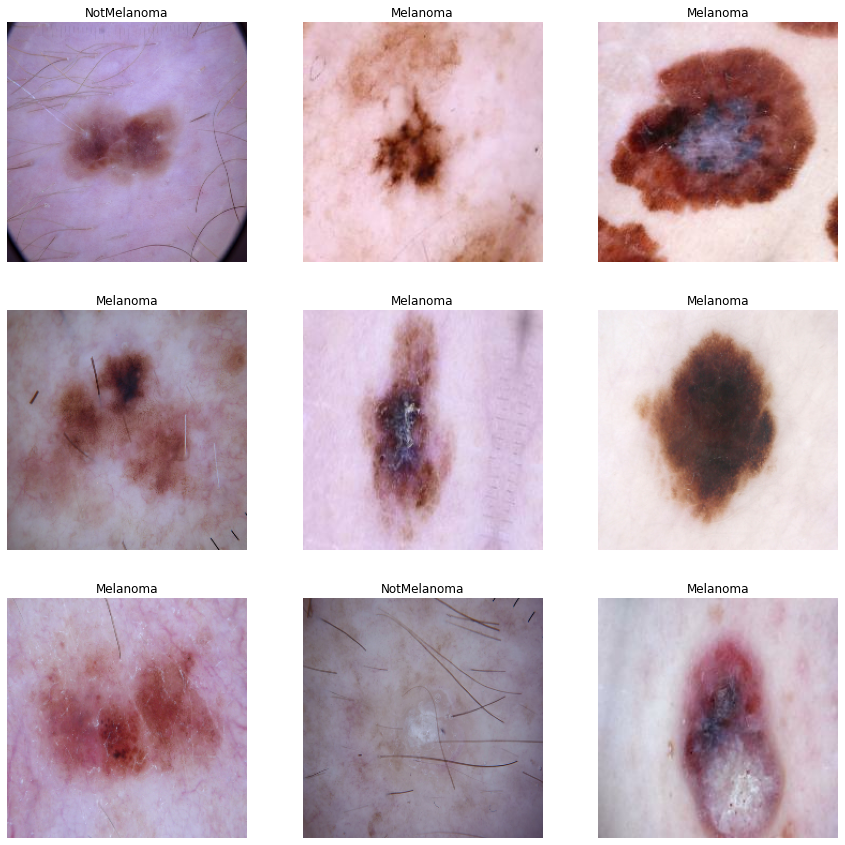

In [19]:
nrows = 3
ncols = 3
k = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(nrows):
        for j in range(ncols):
            axes[i][j].imshow(images[k].numpy().astype("uint8"))
            axes[i][j].set_title(class_names[labels[k]])
            axes[i][j].axis("off")
            k += 1